<a href="https://colab.research.google.com/github/UrviSoni/pytorch_deeplearning/blob/master/Nueral_Network_With_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import torch
import helper
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

In [0]:

#Define transform to normalize the data

data_transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5)),])

#Download and load the training data
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [64]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


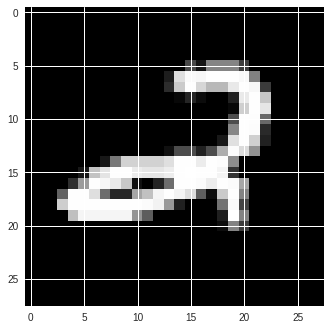

In [65]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [66]:
## Solution

def activation(x):
  return 1/(1+torch.exp(-x))

# Flatten the input images
inputs = images.view(images.shape[0], -1)

# Create Paramters
w1 = torch.randn(784, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs, w1) + b1)

out = torch.mm(h, w2) + b2
print(out.shape)
print(out)


torch.Size([64, 10])
tensor([[ -5.1230,   5.4330,  12.6945,  -4.3191,  10.6914,  -9.7704,  -0.7399,
           9.4534, -13.1986, -13.5462],
        [  1.5110,   0.1349,   5.8488,  -1.6871,   5.7435,  -9.0587,  -6.3381,
          15.9331,  -8.4358,  -7.6676],
        [  2.8951,  -2.6998,  12.1163,  -0.6311,   6.2827,   0.1936, -12.9700,
           6.2398, -16.2262, -13.1249],
        [-14.2283,   2.7820,   9.6109,  -8.5818,  -2.0159, -10.9514, -10.6435,
          11.1473, -14.1327, -12.5275],
        [-10.2844,  10.3430,  10.1808, -12.0144,   0.7533,  -4.8054, -12.6608,
          18.0525,  -2.0814,  -9.4332],
        [-11.8234,   9.8640,   6.1489,  -4.4788,   8.1927,  -8.1177, -15.2522,
           9.1745, -22.3787, -11.5569],
        [ -0.0882,   2.8237,   5.0268,  -7.4132,   2.0379,  -3.6669,   3.2241,
          16.3999,  -8.7998, -10.5911],
        [ -4.2034,   6.5360,  12.3233,  -9.6202,   0.1140,  -6.0325,  -5.6705,
          17.9731, -13.9196,  -9.7382],
        [ -2.7405,   6.4326

In [67]:
## Solution

def softmax(x):
  return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1)

probabilities = softmax(out)

# Does it have the right shape.? Should be (64, 10)
print(probabilities.shape)

# Does it sum to 1?
print(probabilities.sum(dim=1))


torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])
